In [289]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [290]:
# Load the data into a DataFrame
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [291]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [292]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


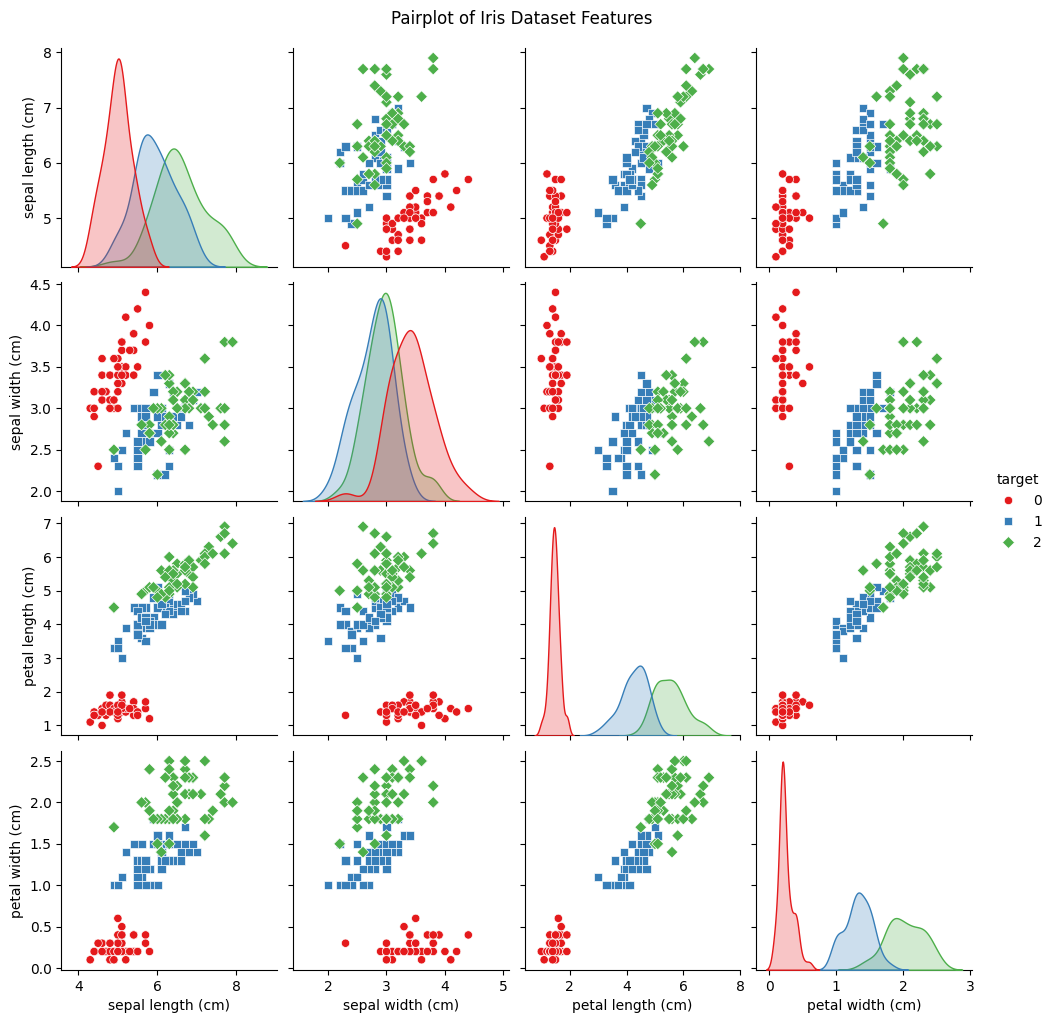

In [293]:
# Pairplot to visualize the relationships between features
sns.pairplot(iris_df, hue='target', palette='Set1', markers=['o', 's', 'D'])
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.show()

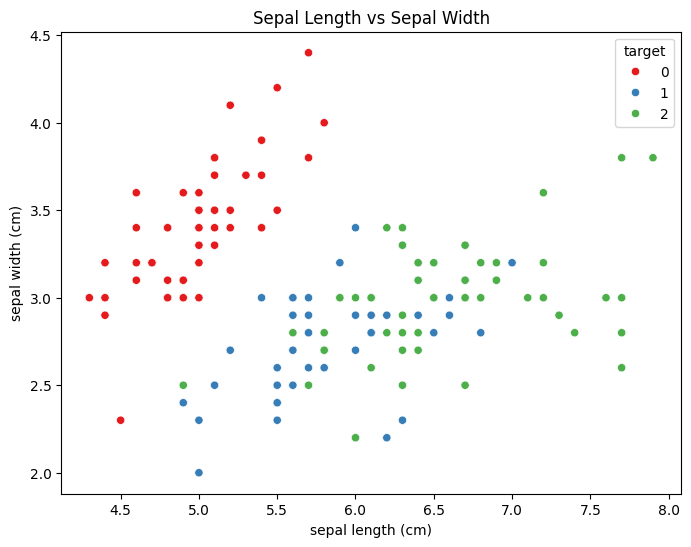

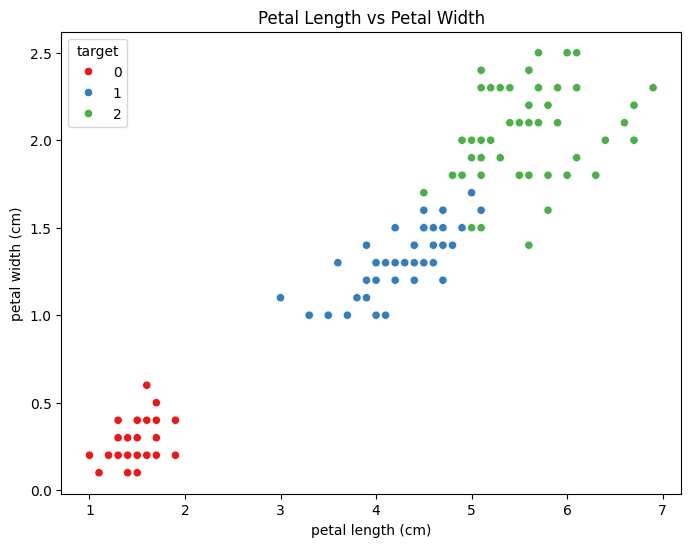

In [294]:
# Visualizing 2D scatter plots for pairs of features
# Sepal Length vs Sepal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x=iris.feature_names[0], y=iris.feature_names[1], hue='target', palette='Set1')
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Petal Length vs Petal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x=iris.feature_names[2], y=iris.feature_names[3], hue='target', palette='Set1')
plt.title('Petal Length vs Petal Width')
plt.show()

# Logistic Regression

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    RocCurveDisplay,
)

In [296]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [297]:
def binary_classification(X, y, positive_class, class_name):
    y_binary = (y == positive_class).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "confusion_matrix": cm,
        "classification_report": classification_report(y_test, y_pred, target_names=["Not " + class_name, class_name]),
    }

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not " + class_name, class_name], yticklabels=["Not " + class_name, class_name])
    plt.title(f"Confusion Matrix: {class_name} vs Not {class_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve: {class_name} vs Not {class_name}")
    plt.show()

    return metrics, model

In [298]:
def plot_decision_boundary(X, y, model, positive_class, class_name, feature_x, feature_y):
    # Reduce to 2D (two selected features)
    X_2d = X[:, [feature_x, feature_y]]
    y_binary = (y == positive_class).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X_2d, y_binary, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    # Generate grid for decision boundary
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_binary, edgecolors="k", cmap="coolwarm")
    plt.title(f"Decision Boundary: {class_name} vs Not {class_name}")
    plt.xlabel(iris.feature_names[feature_x])
    plt.ylabel(iris.feature_names[feature_y])
    plt.show()

Classification: Setosa vs Not Setosa


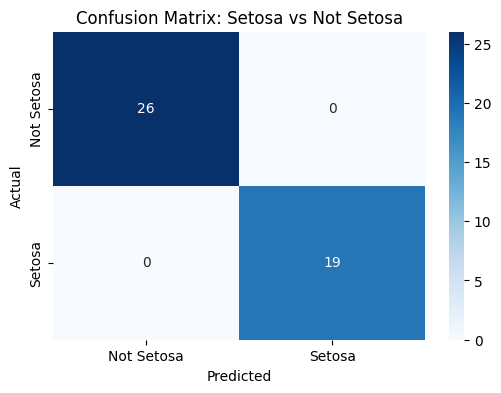

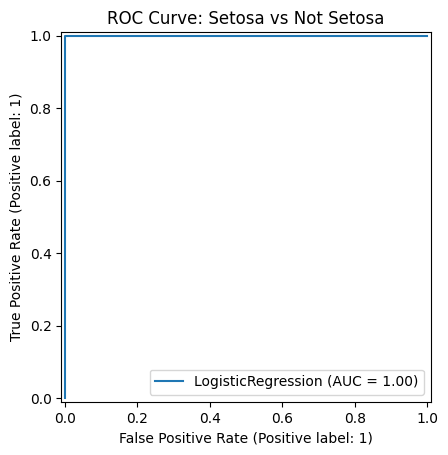

Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
[[26  0]
 [ 0 19]]
Classification Report:
              precision    recall  f1-score   support

  Not Setosa       1.00      1.00      1.00        26
      Setosa       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



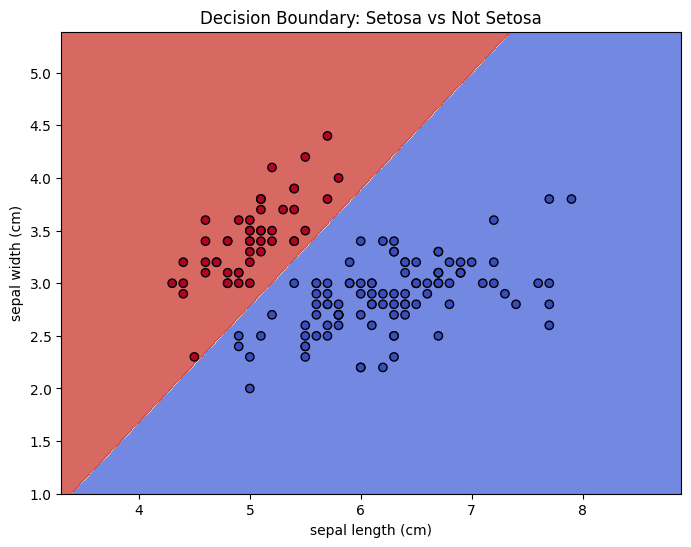

In [299]:
print("Classification: Setosa vs Not Setosa")
setosa_metrics, setosa_model = binary_classification(X, y, positive_class=0, class_name="Setosa")
print(f"Accuracy: {setosa_metrics['accuracy']}")
print(f"F1 Score: {setosa_metrics['f1_score']}")
print("Confusion Matrix:")
print(setosa_metrics['confusion_matrix'])
print("Classification Report:")
print(setosa_metrics['classification_report'])

# Visualize decision boundary for Setosa vs Not Setosa (sepal length vs sepal width)
plot_decision_boundary(X, y, LogisticRegression(max_iter=1000), 0, "Setosa", 0, 1)


Classification: Virginica vs Not Virginica


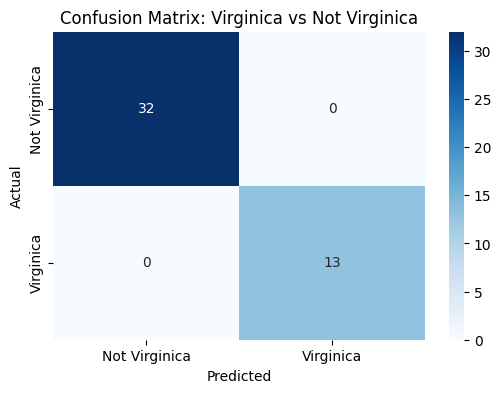

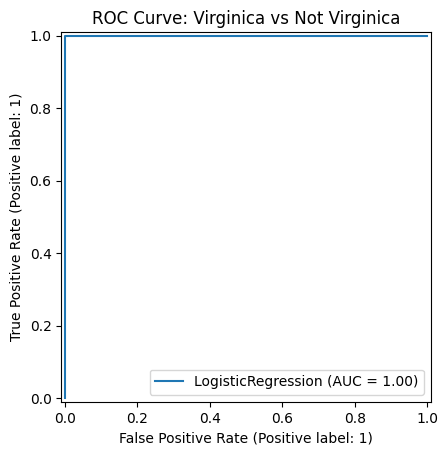

Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
[[32  0]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

Not Virginica       1.00      1.00      1.00        32
    Virginica       1.00      1.00      1.00        13

     accuracy                           1.00        45
    macro avg       1.00      1.00      1.00        45
 weighted avg       1.00      1.00      1.00        45



In [300]:
print("\nClassification: Virginica vs Not Virginica")
virginica_metrics, virginica_model = binary_classification(X, y, positive_class=2, class_name="Virginica")
print(f"Accuracy: {virginica_metrics['accuracy']}")
print(f"F1 Score: {virginica_metrics['f1_score']}")
print("Confusion Matrix:")
print(virginica_metrics['confusion_matrix'])
print("Classification Report:")
print(virginica_metrics['classification_report'])

# Multiclass

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
X, y = data.data, data.target

Accuracy: 100.00%

Matriz de confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



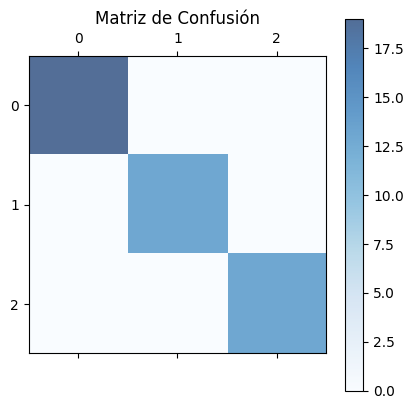

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=200).fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nMatriz de confusión:\n', conf_matrix)
print('\nReporte de clasificación:\n', class_report)

plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.show()

/home/oel/.venv/jupy3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


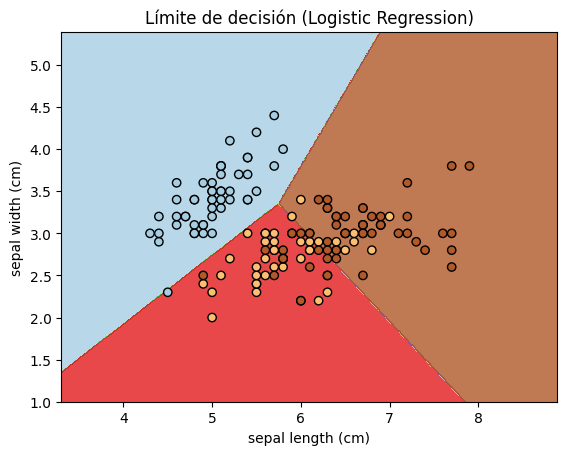

In [303]:
X = X.iloc[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Límite de decisión (Logistic Regression)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

# SVM

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
X, y = data.data, data.target

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_kernel = None
best_accuracy = 0

/home/oel/.venv/jupy3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/oel/.venv/jupy3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/oel/.venv/jupy3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/oel/.venv/jupy3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


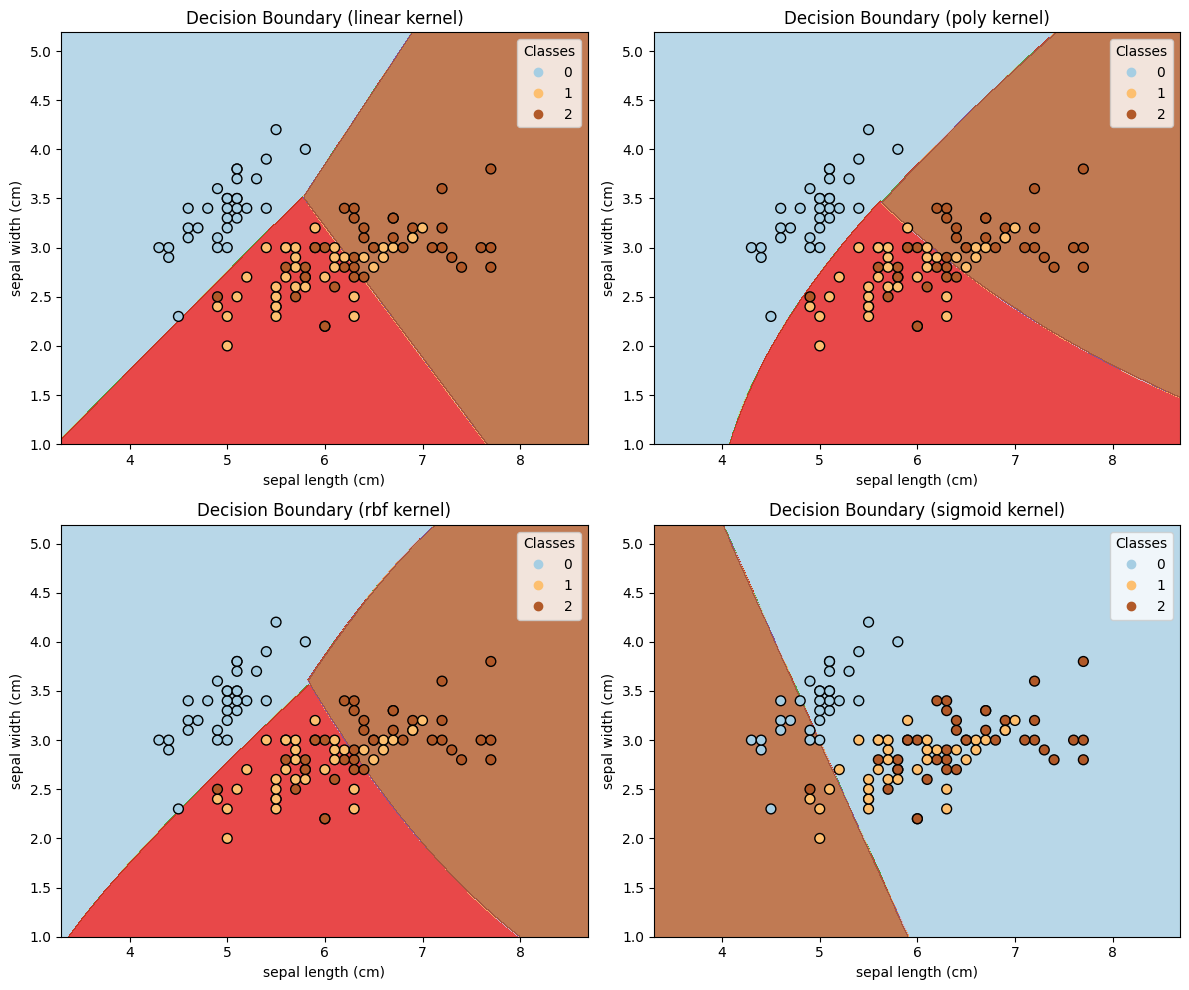

In [305]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, kernel in enumerate(kernels):
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :2], y, test_size=0.3, random_state=42)
    svm_model = SVC(kernel=kernel).fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

    # Decision Boundary Plot
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    axes[idx].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    scatter = axes[idx].scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.Paired, s=50)
    axes[idx].set_title(f"Decision Boundary ({kernel} kernel)")
    axes[idx].set_xlabel(data.feature_names[0])
    axes[idx].set_ylabel(data.feature_names[1])

    # Add legend to each plot
    handles, labels = scatter.legend_elements()
    axes[idx].legend(handles, labels, title="Classes")

plt.tight_layout()
plt.show()

Best Kernel: linear
Accuracy: 100.00%

Matriz de confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



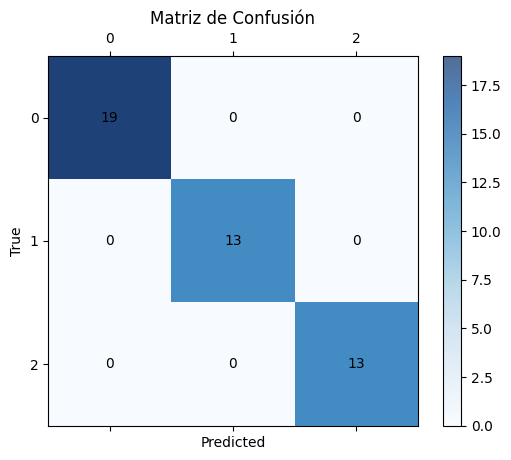

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_model = SVC(kernel=best_kernel).fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Best Kernel: {best_kernel}')
print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nMatriz de confusión:\n', conf_matrix)
print('\nReporte de clasificación:\n', class_report)

fig, ax = plt.subplots()
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.title("Matriz de Confusión")
plt.colorbar(ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()